In [1]:
# Import required Libraries
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import requests
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import json
import numpy as np
import holoviews as hv

# Import API keys
from config import geoapify_key
from config import weather_api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load HME projects weather info into a Dataframe
projects_weather_data_df = pd.read_csv("../project-1/data/projects_weather_data.csv")

# Display sample data
projects_weather_data_df.head()

,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
0,18-054,PAR 1244,"5950 York St, Denver, CO 80216, USA",39.805279,-104.958759,Cold but Good Weather,Blue,28,6
1,18-121,SECURITY SANITATION WWTF IMPROVEMENTS,"6510 Southmoor Dr, Fountain, CO 80817, USA",38.736055,-104.737949,Snow,Red,30,7
2,18-145,WESTERN CURRENCY FACILITY EXPANSION,"8776 Blue Mound Rd, Fort Worth, TX 76131, USA",32.894373,-97.348633,Rain,Red,52,8
3,18-147,BID PACKAGE 4.3 - LEONARD WTP YARD PIPE,"361 Co Rd 4965, Leonard, TX 75452, USA",33.383391,-96.282564,Good Weather,Green,48,9
4,19-040,SADDLE CREEK RTB,"2520 S 64th St, Omaha, NE 68106, USA",41.240430,-96.011843,Cold but Good Weather,Blue,31,8


In [3]:
# Use hvplot.points to create a colorized map

weather_map = projects_weather_data_df.hvplot.points(
    'Lng', 'Lat',
    geo=True, tiles='OSM', height=500, width=700,
    size=55,  # Adjust the size of the points
    line_color='black',
    line_width=0.75,
    color='Weather_Category',  # Set the color of the points
    cmap={'Good Weather': 'green', 'Snow': 'red', 'High Wind': 'yellow', 'Rain': 'red', 'Cold but Good Weather': 'blue', 'Wind and Rain': 'red'},
    title='Projects Weather Map',
    hover_cols=['Project-Number', 'Weather_Category', 'Temperature_F', 'Windspeed_mph'],
    legend='bottom_right',  # Show legend in the bottom-right corner
    
)

# Display the map
weather_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Weather_Category,Project-Number,Temperature_F,Windspeed_mph)

## Map explination:
Projects located with a red dot indicate rain or snow.
Projects located with a yellow dot indicate wind speeds greater than 15mph.
Projects located with a blue dot indicate fair weather but temperature below 32 degrees.
Projects located with a green dot indicate fair weather

The r-value is:-0.38867676193158496
The r-squared is:0.15106962526562198


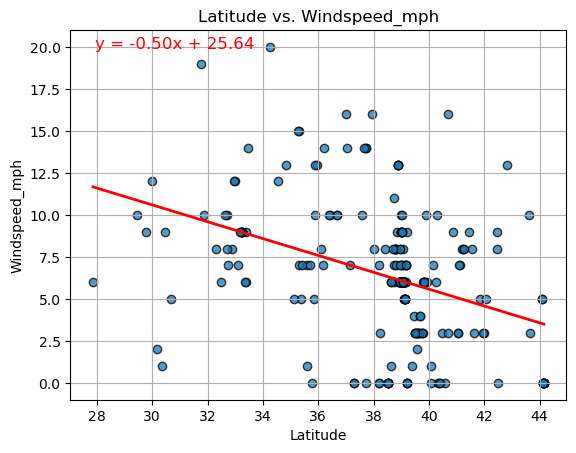

In [4]:
#create scatter plot for Latitude vs Wind

plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Windspeed_mph"], edgecolors="black", alpha=0.75)

# Calculate the regression line
slope, intercept = np.polyfit(projects_weather_data_df["Lat"], projects_weather_data_df["Windspeed_mph"], 1)

# Calculate the correlation coefficient (rvalue)
rvalue, _ = pearsonr(projects_weather_data_df["Lat"], projects_weather_data_df["Windspeed_mph"])

x_values = np.array([min(projects_weather_data_df["Lat"]), max(projects_weather_data_df["Lat"])])
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2)

# Annotate the plot with the line equation
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed_mph")
plt.xlabel("Latitude")
plt.ylabel("Windspeed_mph")
plt.grid(True)

print(f"The r-value is:{rvalue}")
print(f"The r-squared is:{rvalue**2}")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs Windspeed Summary: 
a] There is a weak to moderate (r-value -0.39) negative correlation between latitude and windspeed according to the scatter graph. The r-squared being 0.151 means that 15% of the target variance can be explained by the datasets.
b] There is a weak relationship between the latitude and Windspeed. This is shown by the weak clustering of data-points in the graph. 
c] Its also noted that there are few projects bellow 32degrees latitude and above 42 degrees latitude. 
d] Most of the projects are located between 34 to 42 degrees latitude 
e] Having acknowledged that work/productivity can only stop at a windspeed of 25mph no project station was affected as a result of windspeed, 
f] High windspeed values of more than 15mph were recorded in projects located between 31 - 41 degrees latitude. So that means that there is a likelihood of one of those projects being affected in future by windspeed.

The r-value is:-0.8915696290697701
The r-squared is:0.7948964034796074


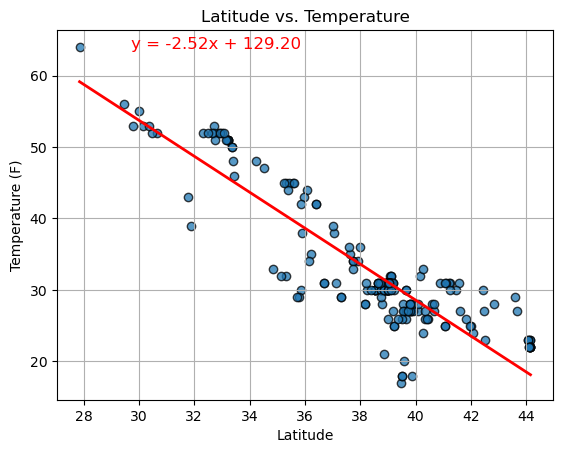

In [6]:
#create scatter plot for Latitude vs Temp
plt.scatter(projects_weather_data_df["Lat"], projects_weather_data_df["Temperature_F"], edgecolors="black", alpha=0.75)

# Calculate the regression line
slope, intercept = np.polyfit(projects_weather_data_df["Lat"], projects_weather_data_df["Temperature_F"], 1)

# Calculate the correlation coefficient (rvalue)
rvalue, _ = pearsonr(projects_weather_data_df["Lat"], projects_weather_data_df["Temperature_F"])

x_values = np.array([min(projects_weather_data_df["Lat"]), max(projects_weather_data_df["Lat"])])
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2)

# Annotate the plot with the line equation
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation_text, xy=(0.15, 0.95), xycoords='axes fraction', fontsize=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
print(f"The r-value is:{rvalue}")
print(f"The r-squared is:{rvalue**2}")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs Temperature Summary:
a] There is a strong negative correlation (r-value -0.89) between latitude and temperature according to the scatter graph. 
b] The r-squared being 0.790 means that 79% of the target variance can be explained by the datasets.

In [7]:
# Calculate measures of central tendency for temperature

mean_temperature = projects_weather_data_df['Temperature_F'].mean()
median_temperature = projects_weather_data_df['Temperature_F'].median()
mode_temperature = projects_weather_data_df['Temperature_F'].mode()

print(f"Mean Temperature: {mean_temperature}")
print(f"Median Temperature: {median_temperature}")
print(f"Mode Temperature: {mode_temperature}")

Mean Temperature: 32.85470085470085
Median Temperature: 31.0
Mode Temperature: 0    31
Name: Temperature_F, dtype: int64


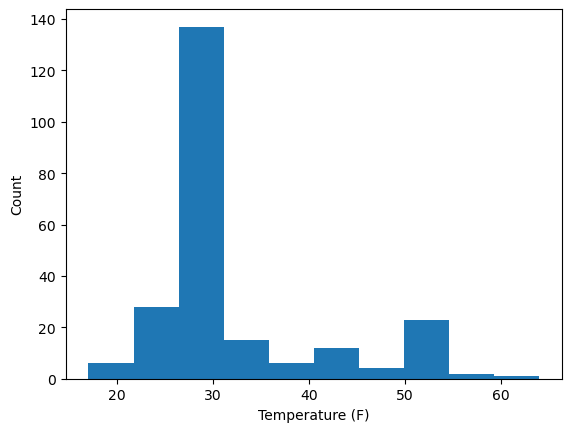

NormaltestResult(statistic=18.114939104454304, pvalue=0.00011651744516922801)


In [8]:
# plot temperatures
temps = projects_weather_data_df['Temperature_F']

plt.hist(temps)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()
print(st.normaltest(temps.sample(75)))

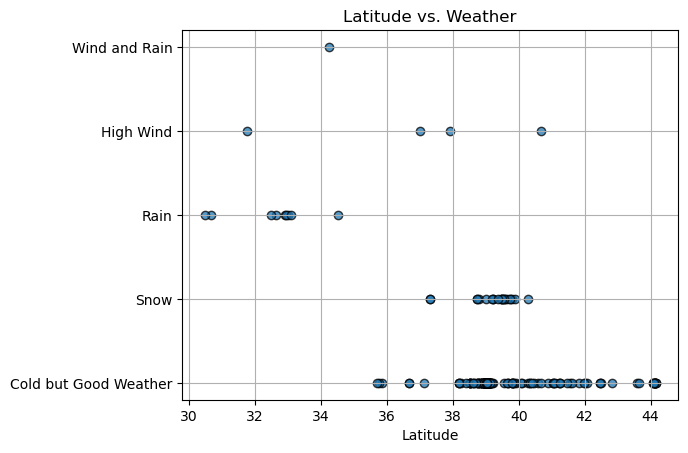

In [9]:
#create scatter plot for all weather days

# Filter out rows with 'Good Weather' in the 'Weather_Category' column
filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

# Create a scatter plot for Weather Category vs Lat
plt.scatter(filtered_df["Lat"], filtered_df["Weather_Category"], edgecolors="black", alpha=0.75)

plt.title("Latitude vs. Weather")
plt.xlabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

## Latitude vs Weather Categories Summary:
a] All projects between 30 to 35 degrees latitude had no snow and they were the only stations that recorded rainfall. 
b] The highest percentage concertration of good weather was recorded in stations located between 38 to 42 degrees latitude. It also recorded the highest percentage of projects that experienced a snow related weather. 
c]All projects located between 41 to 44 degrees latitude had cold but good weather, no snow,rain or high wind recorded. 
d]Both high wind and rain was only recorded between 30 - 35degrees latitude.

In [10]:
# Create bar chart for weather_category
bar_chart = projects_weather_data_df['Weather_Category'].value_counts().hvplot.bar(
    height=400,
    width=800,
    title='Weather Category Distribution',
    xlabel='Weather Category',
    ylabel='Count',
    rot=45
)

# Show the plot
bar_chart

:Bars   [Weather_Category]   (count)

## Weather Category Summary:
a] 148 stations recorded cold but good weather. 
b] 49 stations recorded good weather. 
c] 23 stations recorded snow weather. 
d] 4 stations recorded high wind 
e] 1 station recorded both wind and rain.

In [11]:
# List the total number of projects with rain/snow and/or wind over 15mph

total_projects = len(projects_weather_data_df)
print(f"Total number of projects is: {total_projects}")

bad_weather_filtered_df = projects_weather_data_df[projects_weather_data_df['Weather_Category'] != 'Good Weather']

total_filtered_projects = len(bad_weather_filtered_df)
print(f"Total number of projects with rain/snow and/or wind over 15 mph is: {total_filtered_projects}")

bad_weather_filtered_df.head()

Total number of projects is: 234
Total number of projects with rain/snow and/or wind over 15 mph is: 185


,Project-Number,Name,Address,Lat,Lng,Weather_Category,Color,Temperature_F,Windspeed_mph
0,18-054,PAR 1244,"5950 York St, Denver, CO 80216, USA",39.805279,-104.958759,Cold but Good Weather,Blue,28,6
1,18-121,SECURITY SANITATION WWTF IMPROVEMENTS,"6510 Southmoor Dr, Fountain, CO 80817, USA",38.736055,-104.737949,Snow,Red,30,7
2,18-145,WESTERN CURRENCY FACILITY EXPANSION,"8776 Blue Mound Rd, Fort Worth, TX 76131, USA",32.894373,-97.348633,Rain,Red,52,8
4,19-040,SADDLE CREEK RTB,"2520 S 64th St, Omaha, NE 68106, USA",41.240430,-96.011843,Cold but Good Weather,Blue,31,8
5,19-048,MARCY GULCH WWTP,"8700 US-85, Highlands Ranch, CO 80126, USA",39.556900,-105.033535,Cold but Good Weather,Blue,28,3


## Project summary
185 of the 234 projects are experiencing rain, snow, high wind, or extreme cold temperatures.

In [12]:
# Load HME projects weather info into a Dataframe
Weather_5Day_Forecast_df = pd.read_csv("../project-1/data/Weather_5Day_Forecast.csv")

# Display sample data
Weather_5Day_Forecast_df.head()

,Project-Number,Name,Lat,Lng,Weather_Date,Weather_Type
0,18-054,PAR 1244,39.805279,-104.958759,2024-01-05 06:00:00,good weather
1,18-054,PAR 1244,39.805279,-104.958759,2024-01-05 09:00:00,good weather
2,18-054,PAR 1244,39.805279,-104.958759,2024-01-05 12:00:00,good weather
3,18-054,PAR 1244,39.805279,-104.958759,2024-01-05 15:00:00,good weather
4,18-054,PAR 1244,39.805279,-104.958759,2024-01-05 18:00:00,good weather


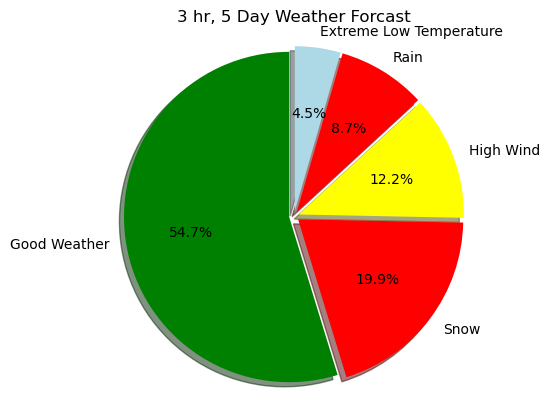

In [13]:
# Create pie chart for forecasted weather
    # if rain and/or snow color red, if high wind color yellow, if rain/snow/wind color red,
    #else if good weather color green

Weather = ['Good Weather', 'Snow', 'High Wind', 'Rain', 'Extreme Low Temperature']
weather_type_counts = Weather_5Day_Forecast_df['Weather_Type'].value_counts().reset_index()
weather_type_counts.columns = ['Weather_Type', 'Count']
colors = ['green', 'red', 'yellow', 'red', 'lightblue']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

plt.title ('3 hr, 5 Day Weather Forcast')

plt.pie(weather_type_counts['Count'], labels=Weather, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode, shadow=True)

plt.axis('equal')

plt.show()

## Weather Forcast Summary:
54.7% of the 3 hour forecasts indicate good waether. The remaining forcasts indicate inclement weather.

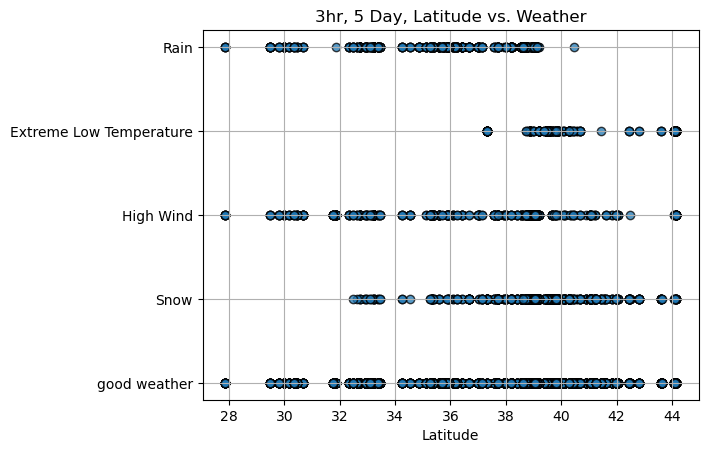

In [14]:
#create scatter plot for all forcasted weather days

# Filter out rows with 'Good Weather' in the 'Weather_Category' column
forecast_filtered_df = Weather_5Day_Forecast_df[Weather_5Day_Forecast_df['Weather_Type'] != 'Good Weather']

# Create a scatter plot for Weather Category vs Lat
plt.scatter(forecast_filtered_df["Lat"], forecast_filtered_df["Weather_Type"], edgecolors="black", alpha=0.75)

plt.title("3hr, 5 Day, Latitude vs. Weather")
plt.xlabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

##  Latitude vs Weather Categories Summary:
Extreme low temperatures appear to start around 38 deg latitude. Snow begins around 32 degrees latitude and rain ends around 40 deg latitude.

In [15]:
# List the total number of projects with rain/snow and/or wind over 15mph forecasted

forecast_total_projects = len(Weather_5Day_Forecast_df)
print(f"Total number of instances is: {forecast_total_projects}")

forecast_bad_weather_filtered_df = Weather_5Day_Forecast_df[Weather_5Day_Forecast_df['Weather_Type'] != 'good weather']

forecast_total_filtered_projects = len(forecast_bad_weather_filtered_df)
print(f"Total number of instances with rain/snow and/or wind over 15 mph is: {forecast_total_filtered_projects}")

forecast_bad_weather_filtered_df.head()

Total number of instances is: 5850
Total number of instances with rain/snow and/or wind over 15 mph is: 2648


,Project-Number,Name,Lat,Lng,Weather_Date,Weather_Type
5,18-054,PAR 1244,39.805279,-104.958759,2024-01-06 06:00:00,Snow
6,18-054,PAR 1244,39.805279,-104.958759,2024-01-06 09:00:00,Snow
8,18-054,PAR 1244,39.805279,-104.958759,2024-01-06 15:00:00,High Wind
15,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 06:00:00,Snow
16,18-054,PAR 1244,39.805279,-104.958759,2024-01-08 09:00:00,Snow


## Project forecast summary
2,648 of the 5,850 instances are forecasting rain, snow, high wind, or extreme cold temperatures.